### install packages and library

In [1]:
library(caret)
library(kernlab)
library(foreign)
library(mlbench)
library(rpart)
library(rpart.plot)
library(ipred)
library(randomForest)
library(gbm)
library(nnet)
library(pROC)
library(ggplot2)
library(ROSE)
library(doParallel)
registerDoParallel(6)
getDoParWorkers()

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'kernlab'


The following object is masked from 'package:ggplot2':

    alpha


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Loaded gbm 2.1.8.1

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Loaded ROSE 0.0-4


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



[1] 6

### Read data

In [2]:
mydata=read.csv("529 prospecive dataset 20170615.csv",header=TRUE,sep=",")

### Data engineering

In [3]:
mydata$death=as.factor(mydata$death)
mydata$si=mydata$pulse/mydata$sbp
mydata$pp=mydata$sbp-mydata$dbp
mydata$buncre=mydata$bun/mydata$cre
mydata$rdwrbc=mydata$rdw/mydata$rbc
mydata$ddimerfdp=mydata$ddimer_case/mydata$fdp_case
mydata$proteincc3=mydata$proteinc_case/mydata$c3_case
mydata$ppi=mydata$lactate/mydata$map

In [4]:
dim(mydata)

[1] 529 120

In [5]:
fitControl=trainControl(method="repeatedcv",
                        number=10,
                        repeats=10,
                        classProbs=TRUE,   
                        summaryFunction=twoClassSummary,
                        search="random")

### Training for Support Vector Machine

In [ ]:
grid<-expand.grid(sigma=10^(-4:-1),C=c(1:100)/30)
svm_train<-train(death~alb+cortisol+ppi+lactate+rr+rdwrbc+gcs+pt,
                 data=mydata,
                 method="svmRadial",
                 preProc=c("center","scale"),
                 metric="ROC",
                 tuneGrid=grid,
                 trControl=fitControl)

### 2-D plots for SVM classification plots

Loading required package: manipulate

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'manipulate'"


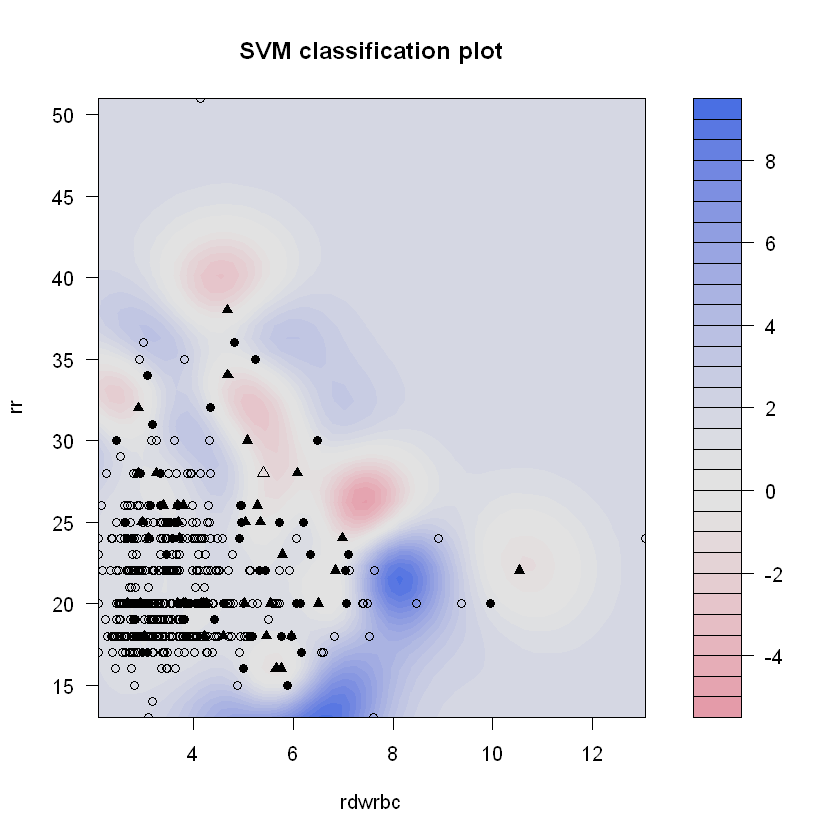

In [6]:
require('manipulate')
# Train a nonlinear SVM
nonlinear.svm<-ksvm(death~rr+rdwrbc,
                    data=mydata,
                    type='C-svc',
                    kernel='rbf',
                    kpar=list(sigma=1),
                    C=100,
                    scale=c())
plot(nonlinear.svm,data=mydata)

## 3-D plots for SVM classification plots

In [7]:
library(e1071)
library(rgl)
library(misc3d)

# Fit SVM
smote_train1=mydata[,c("death","alb","ppi","rdwrbc")]
smote_train1=as.data.frame(smote_train1)
smote_train1$death=as.factor(smote_train1$death)
svm_model=svm(death~alb+ppi+rdwrbc,
              data=smote_train1,
              type='C-classification',
              kernel='linear',
              scale=FALSE)

In [8]:
w<-t(svm_model$coefs)%*%svm_model$SV
detalization<-100 
grid<-expand.grid(seq(from=min(smote_train1$alb),
                      to=max(smote_train1$alb),
                      length.out=detalization),     
                  seq(from=min(smote_train1$ppi),
                      to=max(smote_train1$ppi),
                      length.out=detalization)) 
rdwrbc<-(svm_model$rho-w[1,1]*grid[,1]-w[1,2]*grid[,2])/w[1,3] 
plot3d(grid[,1],
       grid[,2],
       rdwrbc,
       xlab="alb",
       ylab="ppi",
       zlab="rdwrbc",
       col="blue",
       main="3-D plot for SVM classification",
       top=TRUE,
       lwd=8)

In [18]:
plot3d(smote_train1$alb[which(smote_train1$death=="Death")],
       smote_train1$ppi[which(smote_train1$death=="Death")], 
       smote_train1$rdwrbc[which(smote_train1$death=="Death")], 
       col='red',
       size=12,
       add=TRUE) 

In [19]:
plot3d(smote_train1$alb[which(smote_train1$death=="Survival")],
       smote_train1$ppi[which(smote_train1$death=="Survival")], 
       smote_train1$rdwrbc[which(smote_train1$death=="Survival")], 
       col='green',
       add=TRUE,
       size=8)

## Histogram

In [21]:
install.packages('pastecs')

Installing package into 'C:/Users/wujin/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'pastecs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\wujin\AppData\Local\Temp\RtmpSUDMXW\downloaded_packages


The following object is masked _by_ .GlobalEnv:

    rdwrbc


The following objects are masked from mydata (pos = 3):

    abdo_dist, abdo_pain, abdominal_infection, acut_conf, age,
    agitation, alb, anorexia, aptt, ast, band, bilt, bun, buncre,
    c3_case, ca_case, cdsum, ches_pain, ches_tigh, chfsum, chills,
    ckdsum, clchl_case, cns_infection, cold_extr, confusion,
    constipation, convulsion, copdsum, cortisol, cpdsum, cre, crp,
    cyanosis, dbp, ddimer_case, ddimerfdp, death, dementia, diarrhea,
    diff_void, diso_thin, dizziness, dmsum, drawsy, dry_coug, dry_lips,
    dyspnea, dysuria, eos, fdp_case, fever, flan_pain, fluc_cour, gcs,
    gene_sore, gene_weak, GU_infection, hb, headache, hematuria,
    hemoptysis, hopsum, inattention, inorP, inr, lactate, leukemiasum,
    liversum, lymphomasum, malaise, map, mchc, mcv, mldsum,
    msk_infection, msldsum, mstsum, musc_sore, nasa_cong, nausea,
    oliguria, other_infection, pct, plt, pp, ppi, prod_coug,
    proteinc_case, pr

,age,tmp,pulse,sbp,dbp,rr,spaO2,map,gcs,wbc,⋯,sCD163,IL10,Pentraxin3,CD14,TREM1,CD64,ICAM1,Eselectin,Pselectin,VCAM1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,644.00,644.000,644.00,644.00,644.00,644.00,644.000,644.00,644.00,644.00,⋯,94.00,94.000,94.00,94.000,94.000,94.00,94.00,94.0,94.00,94.000
nbr.null,0.00,0.000,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,⋯,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.0,0.00,0.000
nbr.na,0.00,0.000,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,⋯,550.00,550.000,550.00,550.000,550.000,550.00,550.00,550.0,550.00,550.000
min,18.00,33.500,36.00,38.00,28.00,13.00,65.000,31.33,3.00,0.30,⋯,0.15,0.005,0.07,1.195,0.030,2.99,2.59,1.2,1.38,0.061
max,98.00,42.200,208.00,223.00,144.00,51.00,99.000,165.33,15.00,51.70,⋯,7.25,3289.311,5.50,5.541,2.878,495.29,76.54,105.3,13.45,1.414
range,80.00,8.700,172.00,185.00,116.00,38.00,34.000,134.00,12.00,51.40,⋯,7.09,3289.306,5.43,4.346,2.848,492.29,73.94,104.1,12.07,1.352
sum,42200.00,24479.900,71534.00,83953.00,48500.00,13772.00,60010.000,60326.00,8660.00,8403.90,⋯,165.53,6640.953,142.46,221.264,62.406,14599.84,1653.48,980.7,504.44,29.267
median,66.50,38.100,111.00,129.00,74.00,20.00,95.000,93.00,15.00,12.50,⋯,1.29,1.229,1.09,2.249,0.529,134.80,12.79,6.5,5.03,0.234
mean,65.53,38.012,111.08,130.36,75.31,21.39,93.183,93.67,13.45,13.05,⋯,1.76,70.648,1.52,2.354,0.664,155.32,17.59,10.4,5.37,0.311


,age,tmp,pulse,sbp,dbp,rr,spaO2,map,gcs,wbc,⋯,sCD163,IL10,Pentraxin3,CD14,TREM1,CD64,ICAM1,Eselectin,Pselectin,VCAM1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,644.00,644.000,644.00,644.00,644.00,644.00,644.000,644.00,644.00,644.00,⋯,94.00,94.000,94.00,94.000,94.000,94.00,94.00,94.0,94.00,94.000
nbr.null,0.00,0.000,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,⋯,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.0,0.00,0.000
nbr.na,0.00,0.000,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,⋯,550.00,550.000,550.00,550.000,550.000,550.00,550.00,550.0,550.00,550.000
min,18.00,33.500,36.00,38.00,28.00,13.00,65.000,31.33,3.00,0.30,⋯,0.15,0.005,0.07,1.195,0.030,2.99,2.59,1.2,1.38,0.061
max,98.00,42.200,208.00,223.00,144.00,51.00,99.000,165.33,15.00,51.70,⋯,7.25,3289.311,5.50,5.541,2.878,495.29,76.54,105.3,13.45,1.414
range,80.00,8.700,172.00,185.00,116.00,38.00,34.000,134.00,12.00,51.40,⋯,7.09,3289.306,5.43,4.346,2.848,492.29,73.94,104.1,12.07,1.352
sum,42200.00,24479.900,71534.00,83953.00,48500.00,13772.00,60010.000,60326.00,8660.00,8403.90,⋯,165.53,6640.953,142.46,221.264,62.406,14599.84,1653.48,980.7,504.44,29.267
median,66.50,38.100,111.00,129.00,74.00,20.00,95.000,93.00,15.00,12.50,⋯,1.29,1.229,1.09,2.249,0.529,134.80,12.79,6.5,5.03,0.234
mean,65.53,38.012,111.08,130.36,75.31,21.39,93.183,93.67,13.45,13.05,⋯,1.76,70.648,1.52,2.354,0.664,155.32,17.59,10.4,5.37,0.311


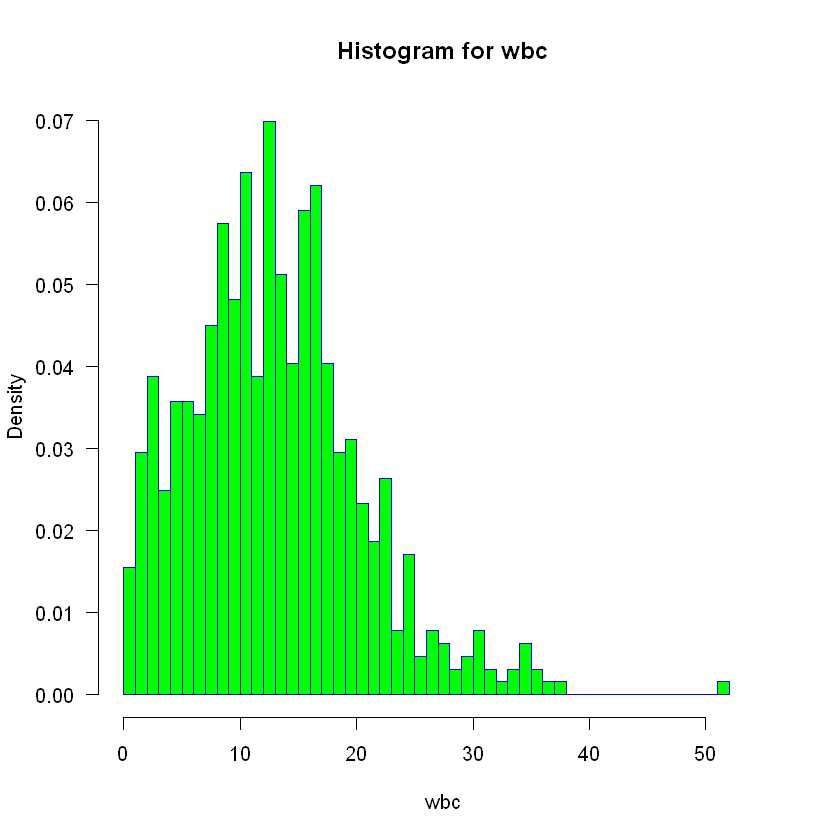

In [26]:
library(pastecs)
attach(mydata)
scores=cbind(age,tmp,pulse,sbp,dbp,rr,spaO2,map,gcs,wbc,band,plt,bilt,aptt,pt,rdw,rbc,hb,mcv,alb,
             bun,inr,ast,mchc,eos,lactate,pct,crp,cre,c3_case,ca_case,uric_case,clchl_case,
             cortisol_case,inorP_case,ddimer_case,proteinc_case,fdp_case,Angiopoetin2,IL6,THF,
             sCD163,IL10,Pentraxin3,CD14,TREM1,CD64,ICAM1,Eselectin,Pselectin,VCAM1)
stat.desc(scores)
options(scipen=100)
options(digits=2)
stat.desc(scores)
windows()
hist(scores[,"wbc"], 
     main="Histogram for wbc", 
     xlab="wbc", 
     border="blue", 
     col="green", 
     xlim=c(0,55), 
     las=1, 
     breaks=40, 
     prob = TRUE)

## lowess plot

In [27]:
library(ggplot2)
contivars=c("age","tmp","pulse","sbp","dbp","rr","spaO2","map","gcs","wbc","band",
            "plt","bilt","aptt","pt","rdw","rbc","hb","mcv","alb","bun","inr","ast",
            "mchc","eos","lactate","pct","crp","cre","fs","sugar","c3_case","ca_case",
            "uric_case","clchl_case","cortisol_case","inorP_case","ddimer_case",
            "proteinc_case","fdp_case")
categoryvars=c("res_infection","GU_infection","skin_infection","abdominal_infection","cns_infection","msk_infection","other_infection")
numericdata=mydata[contivars]
binarydata=mydata[categoryvars]
for(i in 1:ncol(numericdata)){
  numericdata[,i]=ifelse(is.na(numericdata[,i]),mean(numericdata[,i],na.rm=T),numericdata[,i])
}
for(i in 1:ncol(binarydata)){
  binarydata[,i]=ifelse(is.na(binarydata[,i]),0,binarydata[,i])
}
mydata=cbind(death=mydata$death_binary,binarydata,numericdata)
mydata=as.data.frame(mydata)
windows()
ggplot(mydata,aes(x=fdp_case,y=death))+
       geom_point(size=2,alpha=0.4)+
       stat_smooth(method="loess",colour="blue",size=1.5)+
       xlab("fdp_case")+ylab("death")+theme_bw()

ERROR: Error in `[.data.frame`(mydata, contivars): undefined columns selected


### 3D plot

In [ ]:
library(plotly)
setwd("C:/Users/user/Desktop/model selection/644 death prediction model/data")
mydata=read.csv("test 20161004.csv",header=TRUE,sep=",")
sapply(mydata,function(x) sum(is.na(x)))

contivars=c("age","tmp","pulse","sbp","dbp","rr","spaO2","map","gcs","wbc","band","plt","bilt","aptt","pt","rdw","rbc","hb","mcv","alb","bun","inr","ast","mchc","eos","lactate","pct","crp","cre","fs","sugar","c3_case","ca_case","uric_case","clchl_case","cortisol_case","inorP_case","ddimer_case","proteinc_case","fdp_case")
categoryvars=c("Gram","E","V","M","res_infection","GU_infection","skin_infection","abdominal_infection","cns_infection","msk_infection","other_infection")
numericdata=mydata[contivars]
binarydata=mydata[categoryvars]
for(i in 1:ncol(numericdata)){
  numericdata[,i]=ifelse(is.na(numericdata[,i]),mean(numericdata[,i],na.rm=T),numericdata[,i])
}
for(i in 1:ncol(binarydata)){
  binarydata[,i]=ifelse(is.na(binarydata[,i]),0,binarydata[,i])
}
mydata=cbind(binarydata,numericdata,death=mydata$death)
mydata=mydata[,c("death","map","cortisol_case","clchl_case","rdw","bun","ast","plt","pt","ddimer_case")]
windows()
x=mydata$cortisol_case
y=mydata$rdw
z=mydata$plt
death=as.factor(mydata$death)
# Plot
library(scatterplot3d)
scatterplot3d(x,y,z,pch=16)
## Change color by death
colors=c("red","#999999")
scatterplot3d(x,y,z,pch=16,color=colors[death],
              grid=TRUE,box=FALSE,xlab="Cortisol", 
              ylab="Rdw",zlab="Plt")

In [ ]:
### 3-Dimensional (3-D) Visualization using R

In [ ]:
list.of.packages <- c("rgl","ggplot2","knitr","rglwidget")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)
lapply(list.of.packages,function(x){library(x,character.only=TRUE)})
knit_hooks$set(webgl = hook_webgl)
setwd("C:/Users/user/Desktop/model selection/644 death prediction model/data")
mydata=read.csv("test 20161004.csv",header=TRUE,sep=",")
sapply(mydata,function(x) sum(is.na(x)))

contivars=c("age","tmp","pulse","sbp","dbp","rr","spaO2","map","gcs","wbc","band","plt","bilt","aptt","pt","rdw","rbc","hb","mcv","alb","bun","inr","ast","mchc","eos","lactate","pct","crp","cre","fs","sugar","c3_case","ca_case","uric_case","clchl_case","cortisol_case","inorP_case","ddimer_case","proteinc_case","fdp_case")
categoryvars=c("Gram","E","V","M","res_infection","GU_infection","skin_infection","abdominal_infection","cns_infection","msk_infection","other_infection")
numericdata=mydata[contivars]
binarydata=mydata[categoryvars]
for(i in 1:ncol(numericdata)){
                              numericdata[,i]=ifelse(is.na(numericdata[,i]),mean(numericdata[,i],na.rm=T),numericdata[,i])
}
for(i in 1:ncol(binarydata)){
                              binarydata[,i]=ifelse(is.na(binarydata[,i]),0,binarydata[,i])
}
mydata=cbind(binarydata,numericdata,death=mydata$death)
mydata=mydata[,c("death","map","cortisol_case","clchl_case","rdw","bun","ast","plt","pt","ddimer_case")]
str(mydata)
plot3d(mydata$map,mydata$cortisol_case,mydata$rdw,type="p",size=5,lit=FALSE,box=FALSE,col=c("red","blue","green"),expand=1,main="Map Vs Cortisol Vs Rdw",sub="3-D Plot",xlab="Map",ylab="Cortisol",zlab="Rdw")
rgl.bbox(color=c("#333377","black"),emission="#112233",
         specular="#1A2B3C", shininess=5, alpha=0.8, nticks = 3 ) 
aspect3d(1,1,1)
       
plot_ly(mydata, x = ~rdw, y = ~plt, z = ~ddimer_case, 
             marker = list(color=~death, colorscale = c('#FFE1A1', '#683531'), showscale = TRUE)) %>%
                              add_markers() %>%
                              layout(scene = list(xaxis = list(title = 'rdw'),
                                                  yaxis = list(title = 'plt'),
                                                  zaxis = list(title = 'ddimer')),
                                     annotations = list(
                                                                   
                                     ))

## heatmap of correlation matrix

In [ ]:
library(ggplot2)
library(reshape2)
setwd("C:/Users/user/Desktop/model selection/644 death prediction model/data")
mydata=read.csv("test 20161004.csv",header=TRUE,sep=",")
sapply(mydata,function(x) sum(is.na(x)))

contivars=c("age","tmp","pulse","sbp","dbp","rr","spaO2","map","gcs","wbc","band","plt","bilt","aptt","pt","rdw","rbc","hb","mcv","alb","bun","inr","ast","mchc","eos","lactate","pct","crp","cre","fs","sugar","c3_case","ca_case","uric_case","clchl_case","cortisol_case","inorP_case","ddimer_case","proteinc_case","fdp_case")
categoryvars=c("Gram","E","V","M","res_infection","GU_infection","skin_infection","abdominal_infection","cns_infection","msk_infection","other_infection")
numericdata=mydata[contivars]
binarydata=mydata[categoryvars]
for(i in 1:ncol(numericdata)){
                              numericdata[,i]=ifelse(is.na(numericdata[,i]),mean(numericdata[,i],na.rm=T),numericdata[,i])
}
for(i in 1:ncol(binarydata)){
                              binarydata[,i]=ifelse(is.na(binarydata[,i]),0,binarydata[,i])
}
mydata=cbind(binarydata,numericdata,death=mydata$death)
#"map","cortisol_case","clchl_case","rdw","bun","ast","plt","pt","ddimer_case"
mydata=mydata[,c("map","rr","pulse","plt","pt","ddimer_case","crp","pct","c3_case","proteinc_case","alb","lactate","ast","bun","wbc","rbc","rdw","clchl_case","ca_case","cortisol_case","gcs")]
M<-cor(mydata)
library(corrplot)
windows()
corrplot(M, method="circle")
corrplot(M, method="number")
plot(mydata)
windows()
qplot(x=Var1, y=Var2, data=melt(cor(mydata,use="p")), fill=value, geom="tile") +
                              scale_fill_gradient2(limits=c(-1, 1))

library(plotrix)
library(seriation)
library(MASS)
plotcor <- function(r, addtext=TRUE, atcex=NULL, incdiag=FALSE,
                    rorder=TRUE, plot=TRUE, ...) {
                              
                              # round to the nearest hundredth
                              rr <- round(r, 2)
                              
                              dimr <- dim(r)
                              sym <- isSymmetric(r)
                              
                              # get rid of diagonal numbers
                              if (!incdiag & sym) {
                                                            diag(rr) <- NA
                              }
                              
                              rrf <- format(rr)
                              rrf[grep("NA", rrf)] <- ""
                              rra <- abs(rr)
                              nx <- dimr[2]
                              ny <- dimr[1]
                              if (is.null(atcex)) {
                                                            atcex <- 8/max(nx, ny)
                              }
                              namzx <- dimnames(rr)[[2]]
                              namzy <- dimnames(rr)[[1]]
                              
                              # order rows/columns
                              ordx <- 1:nx
                              ordy <- 1:ny
                              if (rorder) {
                                                            # the seriate() function prints out % explained variance for method="PCA"
                                                            # I used capture.output to avoid having this print to the screen
                                                            dummy <- capture.output(ser <- seriate((1-r)/2, method="PCA"))
                                                            ordy <- rev(get_order(ser, 1))
                                                            ordx <- rev(get_order(ser, 2))
                              }
                              if (sym) {
                                                            ordx <- rev(ordy)
                              }
                              
                              if (plot) {
                                                            # categorize correlations from -1 to 1 by 0.01
                                                            brks <- seq(-1, 1, 0.01)
                                                            rcat <- apply(rr, 2, cut, breaks=brks, labels=FALSE)
                                                            
                                                            # assign colors on the cyan-magenta scale
                                                            colz <- apply(rcat, 2, function(x) cm.colors(length(brks))[x])
                                                            par(xaxs="i", yaxs="i", mar=c(0.1, 7, 7, 0.1), ...)
                                                            eqscplot(1, 1, type="n", xlim=c(0.5, nx+0.5), ylim=c(0.5, ny+0.5),
                                                                     xlab="", ylab="", axes=FALSE)
                                                            for(i in 1:nx) {
                                                                                          for(j in 1:ny) {
                                                                                                                        io <- ordx[i]
                                                                                                                        jo <- ordy[j]
                                                                                                                        draw.ellipse(i, j, a=0.5, b=0.5, col=colz[jo, io], border=NA)
                                                                                                                        draw.ellipse(i, j, a=0.5, b=(1-rr[jo, io]^2)/2,
                                                                                                                                     angle=45*c(-1, 1)[1+(rr[jo, io]>0)], col="white", border=NA)
                                                                                                                        if (addtext & !is.na(rra[jo, io])) {
                                                                                                                                                      text(i, j, rrf[jo, io], cex=atcex, col=rgb(0, 0, 0, alpha=rra[jo, io]))
                                                                                                                        }
                                                                                          }}
                                                            axis(3, at=1:nx, labels=namzx[ordx], las=2, tick=FALSE)
                                                            axis(2, at=1:ny, labels=namzy[ordy], las=2, tick=FALSE)
                              }
                              
                              list(rev(ordy), ordx)
}
windows()
plotcor(cor(mydata), mar=c(0.1, 4, 4, 0.1))


In [ ]:
### 3D plot for fever up to 5 days
library(plotly)
setwd("C:/Users/user/Desktop/model selection/644 death prediction model/data")
mydata=read.csv("fever 5 up.csv",header=TRUE,sep=",")
sapply(mydata,function(x) sum(is.na(x)))

contivars=c("age","tmp","pulse","sbp","dbp","rr","spaO2","map","gcs","wbc","band","plt","bilt","aptt","pt","rdw","rbc","hb","mcv","alb","bun","inr","ast","mchc","eos","lactate","pct","crp","cre","fs","sugar","c3_case","ca_case","uric_case","clchl_case","cortisol_case","inorP_case","ddimer_case","proteinc_case","fdp_case")
categoryvars=c("Gram","E","V","M","res_infection","GU_infection","skin_infection","abdominal_infection","cns_infection","msk_infection","other_infection")
numericdata=mydata[contivars]
binarydata=mydata[categoryvars]
for(i in 1:ncol(numericdata)){
  numericdata[,i]=ifelse(is.na(numericdata[,i]),mean(numericdata[,i],na.rm=T),numericdata[,i])
}
for(i in 1:ncol(binarydata)){
  binarydata[,i]=ifelse(is.na(binarydata[,i]),0,binarydata[,i])
}
mydata=cbind(binarydata,numericdata,death=mydata$death)
mydata=mydata[,c("death","age","map","plt","rdw","rbc","alb","bun","lactate","c3_case")]
windows()
x=mydata$age
y=mydata$map
z=mydata$rdw
death=as.factor(mydata$death)
# Plot
library(scatterplot3d)
scatterplot3d(x,y,z,pch=16)
## Change color by death
colors=c("red","#999999")
scatterplot3d(x,y,z,pch=16,color=colors[death],
              grid=TRUE,box=FALSE,xlab="age", 
              ylab="map",zlab="rdw")
